In [1]:
import numpy as np
import matplotlib.pyplot as plt

This notebook provide the code to generate the npy file that will be needed to get the standart devion chart in a project 


In [2]:
#X_train and X_test shoud have the following shape : (Frame, dims,  time serie)  ex: (1355, 27, 456) with 1355 frame of 27 dims with each 456 record in it
#y_train and y_test shoud have the following shape : (Frame,)  ex: (1355,) with 1355 frame of 0 or 1 label in it


In [3]:
dimension_list = range(1, 28)

In [4]:
#genrate syntehtic data
def genrate_data():
    X_train_0 = np.random.rand(1355, 27, 456)
    y_train = np.random.randint(2, size=1355)
    X_test = np.random.rand(339, 27, 456)
    y_test = np.random.randint(2, size=339)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = genrate_data()

In [5]:
def get_std(dim,classe):
    all_row = []
    concat_x = np.concatenate((X_train,X_test))
    concat_y = np.concatenate((y_train,y_test))
    for i in range(len(concat_x)):
        if  concat_y[i] == classe:
            all_row.append(concat_x[i][dim])
    return np.std(all_row,axis=0), np.mean(all_row,axis=0)

all_classes_std_mean = []
for i in range(27):
    all_classes_std_mean.append(get_std(i,0))

all_classes_std_mean_1 = []
for i in range(27):
    all_classes_std_mean_1.append(get_std(i,1))

np.save('all_classes_std_mean_0.npy',all_classes_std_mean)
np.save('all_classes_std_mean_1.npy',all_classes_std_mean_1)

Exemple : 

Text(0, 0.5, '1')

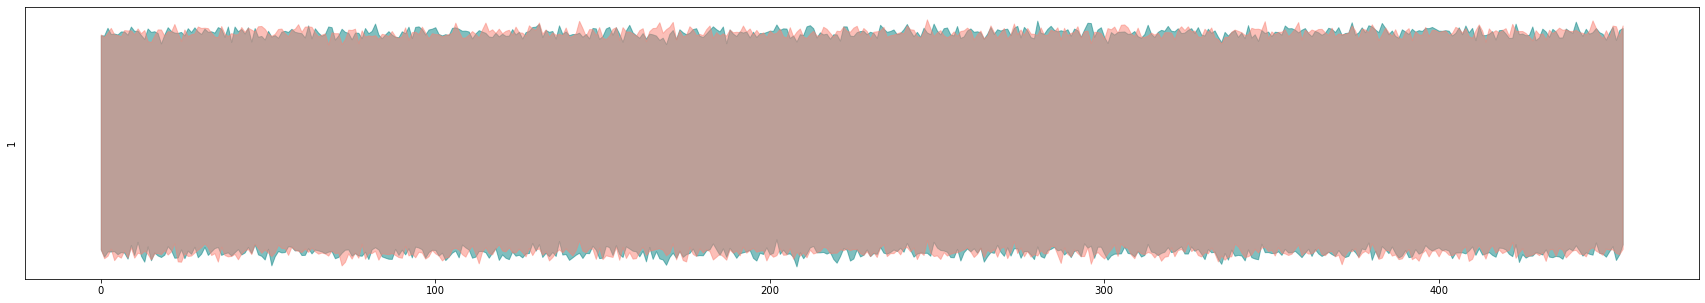

In [6]:
plt.figure(figsize=(30,5))
plt.fill_between(range(len( all_classes_std_mean[0][1])), all_classes_std_mean[0][1]-all_classes_std_mean[0][0], all_classes_std_mean[0][1]+all_classes_std_mean[0][0], alpha=0.5, color='teal')
plt.fill_between(range(len( all_classes_std_mean[0][1])), all_classes_std_mean_1[0][1]-all_classes_std_mean_1[0][0], all_classes_std_mean_1[0][1]+all_classes_std_mean_1[0][0], alpha=0.5, color='salmon')

plt.yticks([])
plt.ylabel(dimension_list[0])